## Necessary Imports

In [ ]:
import pandas as pd
import src.visualization as vis
import importlib
importlib.reload(vis)
from matplotlib import pyplot as plt
import seaborn as sns
import  numpy as np
pal = sns.color_palette()

## Reading All The Data

In [ ]:
data = pd.read_csv('../../data/raw_data/data.csv')

In [ ]:
data

In this dataset, we are given question pairs and a 'is_duplicate' column which indicates whether the question pairs  are duplicate of each other or not.

## Questions Analysis

#### Questions Extraction

In [ ]:
# Counting the number of NaN values in each column
nan_counts = data.isna().sum()
print(nan_counts)

In [ ]:
# Replace missing values with and empty string
data.fillna('', inplace=True)

# Convert questions to a string data type
data.question1 = data.question1.astype(str)
data.question2 = data.question2.astype(str)

In [ ]:
# Combine qid1 and question1 into a new DataFrame df_q1
df_q1 = data[['qid1', 'question1']].rename(columns={'qid1': 'qid','question1':'question'})

# Combine qid2 and question2 into a new DataFrame df_q2
df_q2 = data[['qid2', 'question2']].rename(columns={'qid2': 'qid','question2':'question'})

# Concatenate the two DataFrames
df_questions = pd.concat([df_q1, df_q2], axis=0)

# Drop duplicates
df_questions = df_questions.drop_duplicates()

# Reset index
df_questions = df_questions.reset_index(drop=True)

In [ ]:
# Adding question length and word count columns
df_questions['length'] = df_questions['question'].apply(lambda x: len(x))
df_questions['word_count'] = df_questions['question'].apply(lambda x: len(x.split()))

In [ ]:
df_questions

In [ ]:
# Saving df_questions dataset in a csv file "questions"
df_questions.to_csv("../../data/raw_data/questions.csv", index=False)

#### Questions Analysis

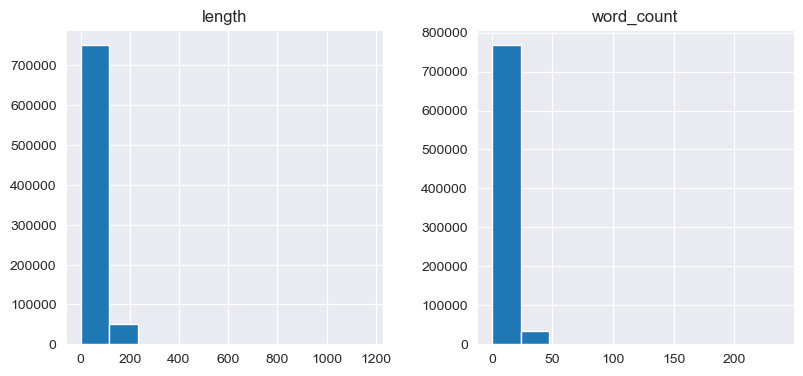

In [93]:
# Plotting histogram for length and word count features
vis.histPlotAll(df_questions[["length","word_count"]])

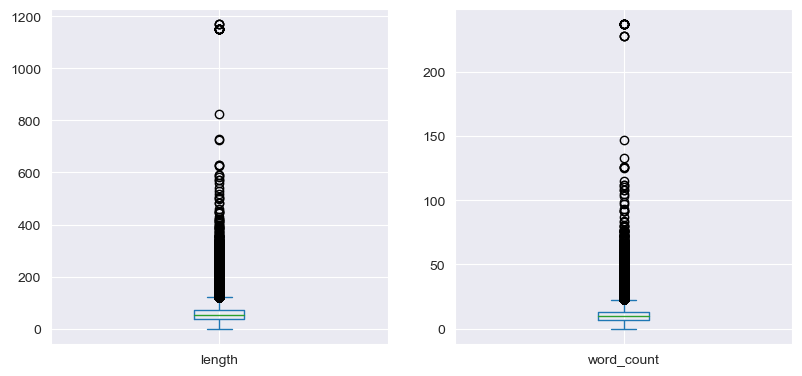

In [90]:
# Generating box plots for length and word count features
vis.boxPlotAll(df_questions[["length","word_count"]])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


mean 59.88 std 32.01 max 1169.00 min 0.00


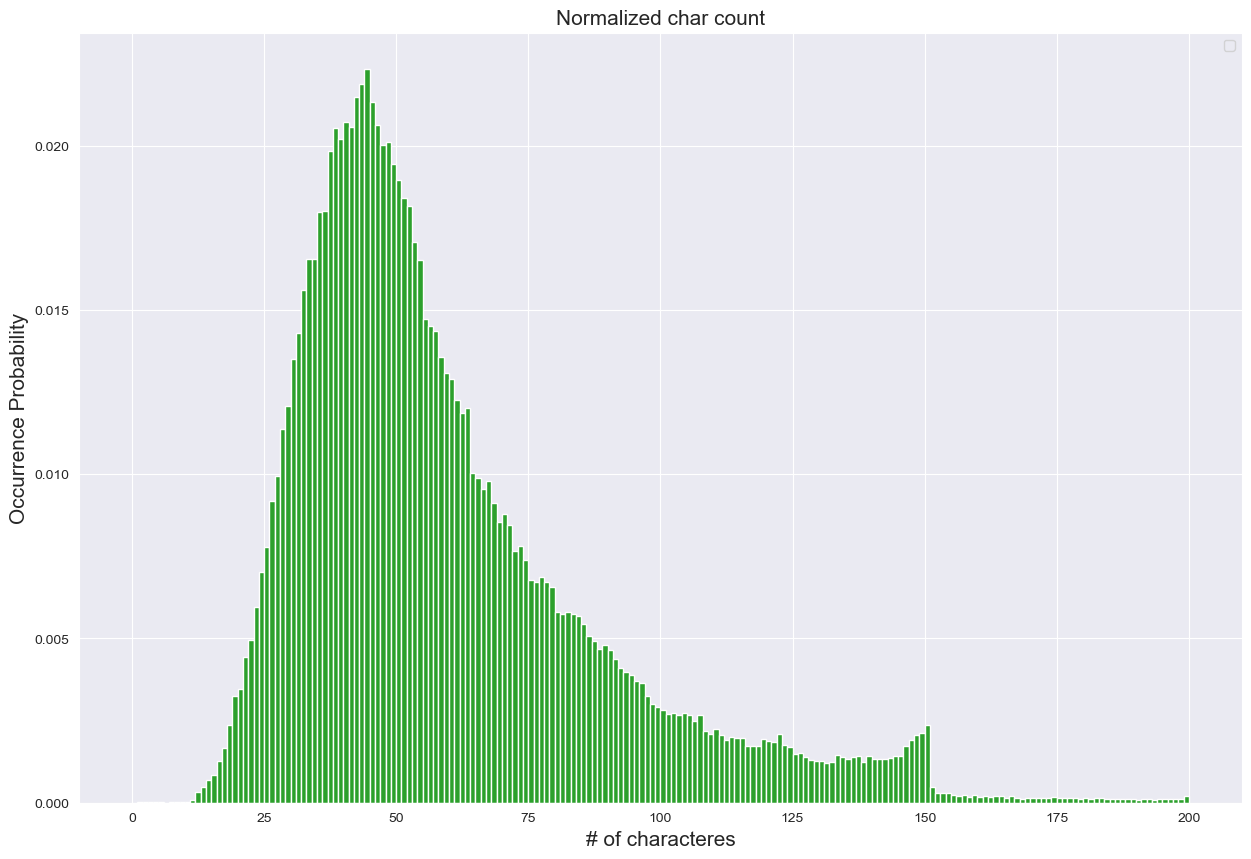

In [95]:
# Converting the 'question' column to a Series of strings, replacing NaN values with empty strings.
pairs_qs = pd.Series(df_questions['question'].fillna('').tolist()).astype(str)
# Calculating char count for each question
dist = pairs_qs.apply(len)

# Generating a histogram of the normalized character count for the pairs of questions.
plt.figure(figsize=(15, 10))
plt.hist(dist, bins=200, range=[0, 200], color=pal[2],  density=True)
plt.title('Normalized char count', fontsize=15)
plt.legend()
plt.xlabel('# of characteres', fontsize=15)
plt.ylabel('Occurrence Probability', fontsize=15)

# Printing the mean, standard deviation, and maximum character count.
print('mean {:.2f} std {:.2f} max {:.2f} min {:.2f}'.format(dist.mean(), dist.std(), dist.max(),dist.min()))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


mean 11.08 std 5.90 max 237.00 


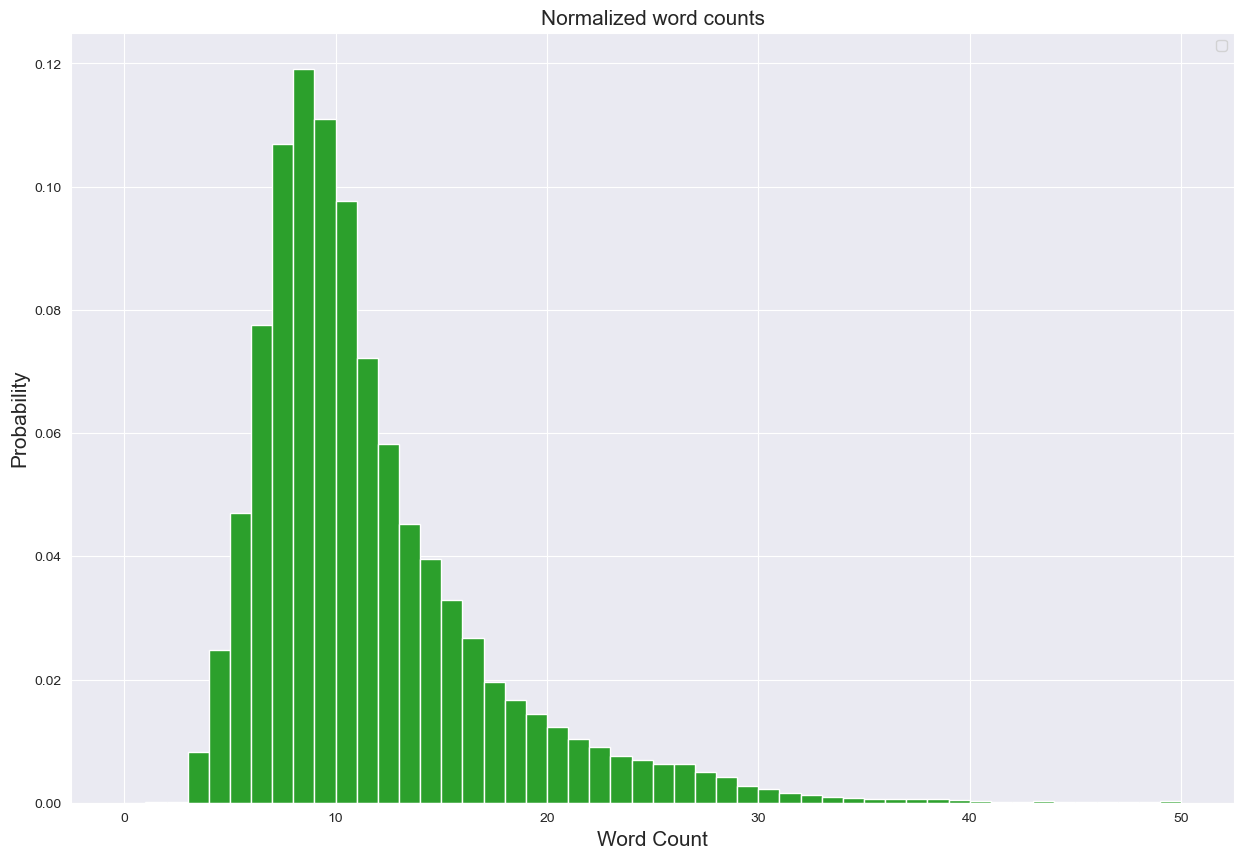

In [94]:
# Calculating word count for each question
dist_words = pairs_qs.apply(lambda x: len(x.split(' ')))

# Generating a histogram of the normalized word count for the pairs of questions.
plt.figure(figsize=(15, 10))
plt.hist(dist_words, bins=50, range=[0, 50], color=pal[2], density=True)
plt.title('Normalized word counts', fontsize=15)
plt.legend()
plt.xlabel('Word Count', fontsize=15)
plt.ylabel('Probability', fontsize=15)

# Printing the mean, standard deviation, and maximum word count.
print('mean {:.2f} std {:.2f} max {:.2f} '.format(dist_words.mean(), dist_words.std(), dist_words.max()))

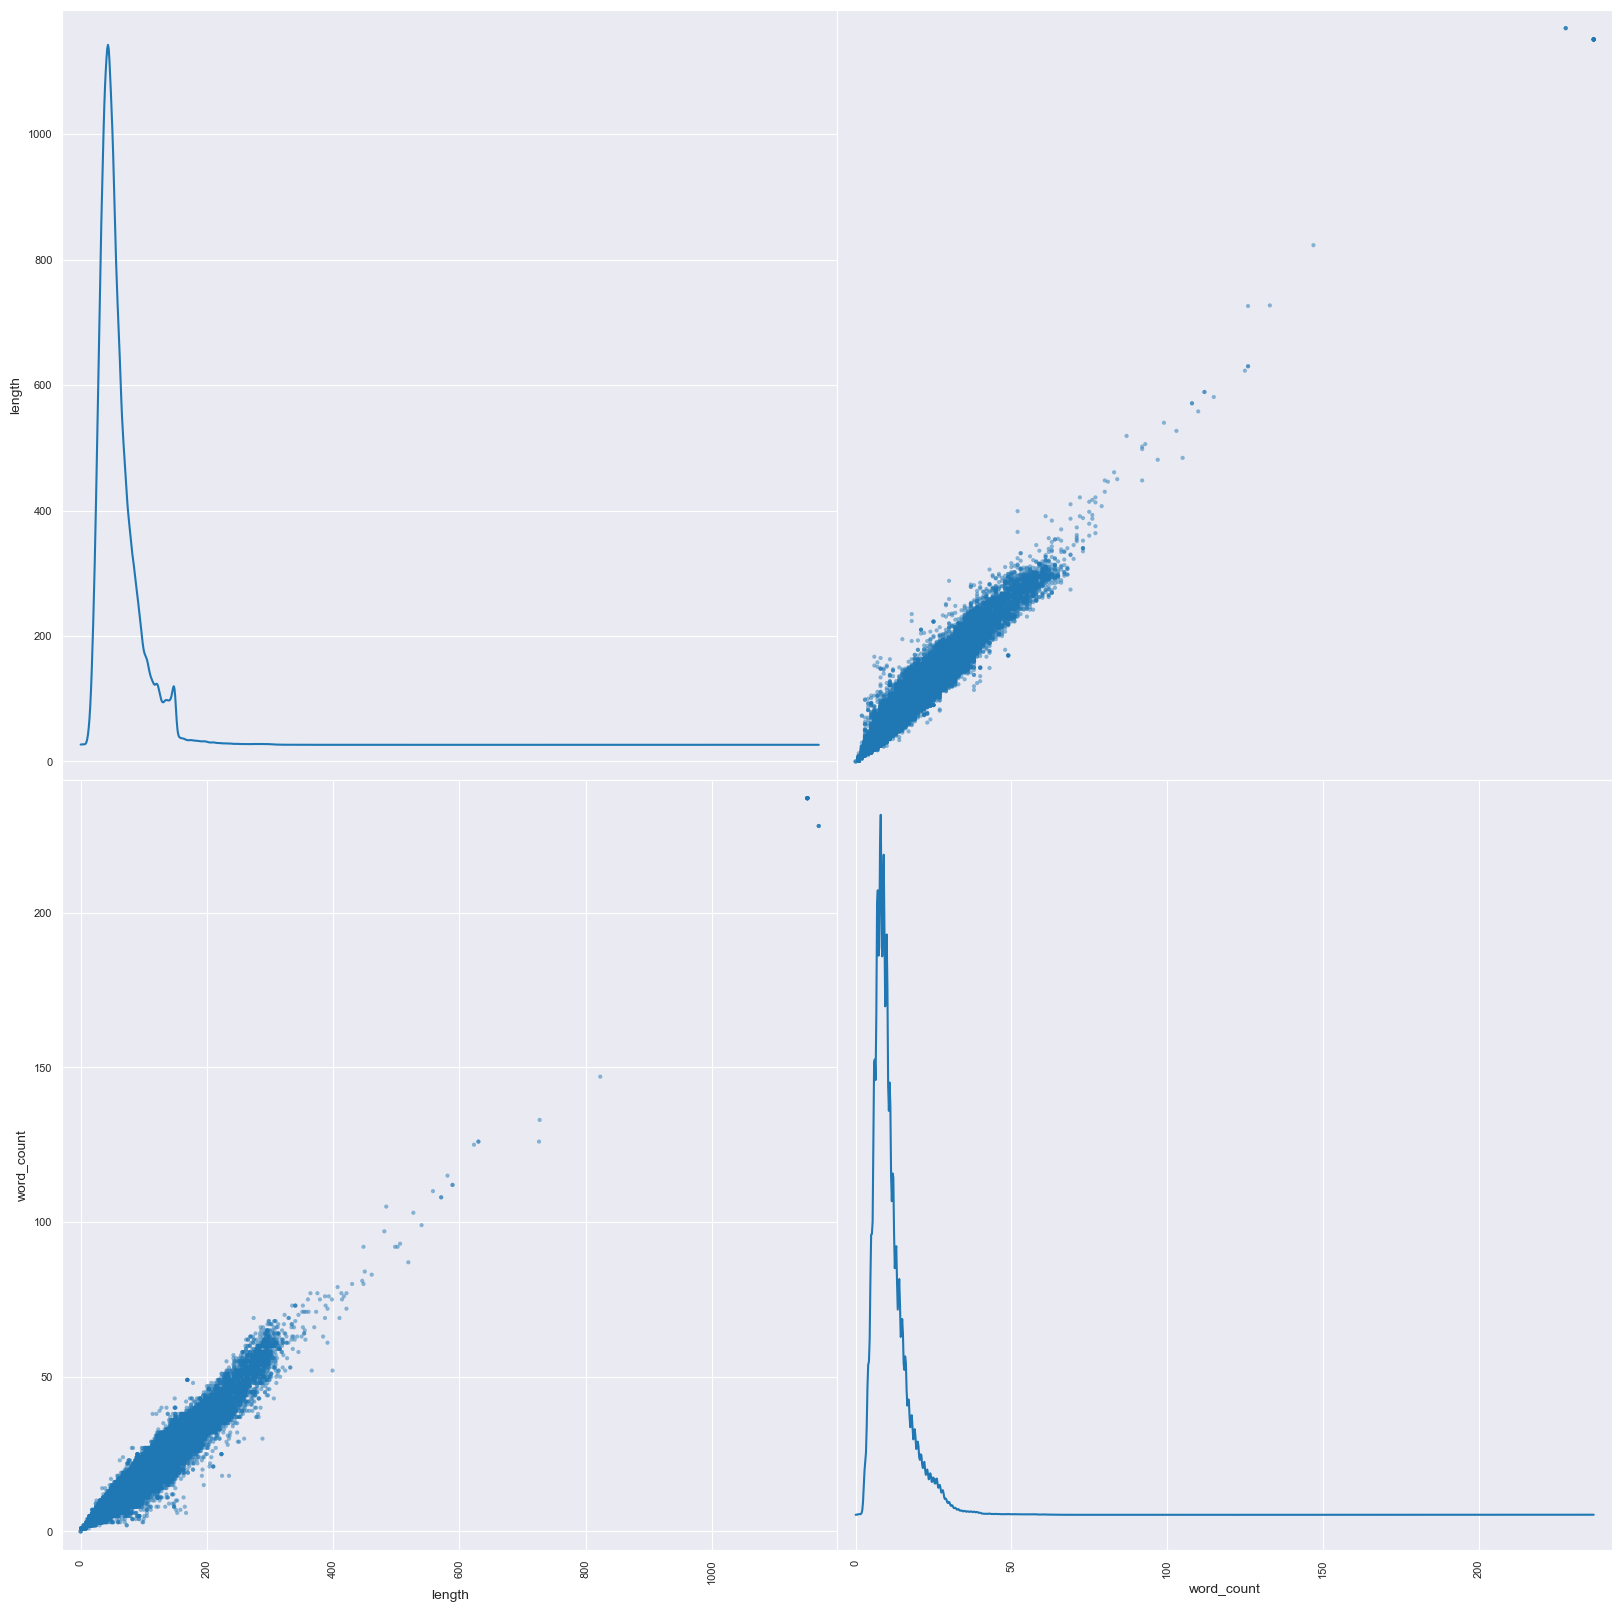

In [98]:
 vis.scatterMatrix(df_questions[["length","word_count"]])

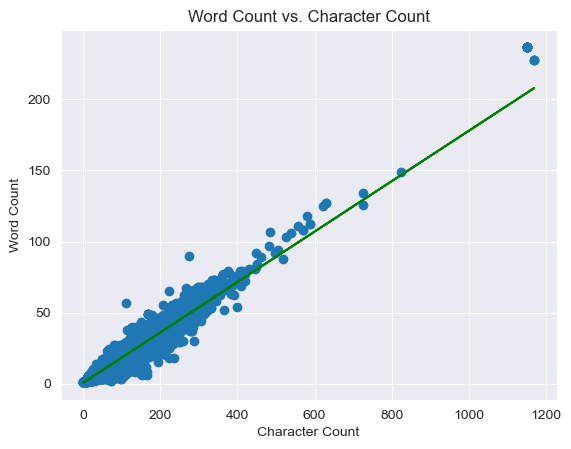

In [97]:
plt.scatter(dist, dist_words)
plt.title("Word Count vs. Character Count")
plt.xlabel("Character Count")
plt.ylabel("Word Count")

# Adding a trendline (optional)
coefficients = np.polyfit(dist, dist_words, 1)
poly = np.poly1d(coefficients)
plt.plot(dist, poly(dist), color='g')

# Displaying the plot
plt.show()